In [2]:
install.packages('e1071')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
library(e1071)


Attaching package: ‘e1071’


The following object is masked from ‘package:Hmisc’:

    impute




In [1]:
##
## MSI - LABORATORIUM 1
## PAWEL MERGIST
##

install.packages("caret")
install.packages("pROC")
install.packages('Hmisc')
install.packages('e1071')

library(caret)
library(pROC)
library(e1071)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Loading required package: lattice

Loading required package: ggplot2

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




ERROR: ignored

In [6]:


#
# Zadanie 1
#

# W ramach poznania klasyfikatora zapoznaj si?? z dokumentem svm.pdf za????czonym w pliku z ??wiczeniami.
#  a) Zastan??w si?? jaki wp??yw ma sta??a C na wyniki klasyfikatora?

# ODP: C - skaluje naruszanie warunku yi(wT x + b)) >= 1 w ktorym plaszczyzna separujemy wektory (dane) na dwa zbiory

#  b) Przyjmijmy, ??e mamy zbi??r treningowy o rozmiarze m x p (m liczba przypadk??w
#  treningowych, p liczba cech). W ilu wymiarowej przestrzeni b??d?? realizowane obliczenia dla j??da RBF?

# ODP: W przestrzeni o jednym wymiarze wiecej

#  c) Czy SVM jest klasyfikatorem liniowym? Odpowiadaj?? na pytanie pos??u?? si?? powy??szym rysunkiem.

# ODP: TAK - separatorem jest plaszczyzna. Wspolczynki w formule rozdzielajacej sa stalymi. 




,Sex,Bwt,Hwt
,<fct>,<dbl>,<dbl>
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3
6,F,2.1,7.6


 Sex         Bwt             Hwt       
 F:47   Min.   :2.000   Min.   : 6.30  
 M:97   1st Qu.:2.300   1st Qu.: 8.95  
        Median :2.700   Median :10.10  
        Mean   :2.724   Mean   :10.63  
        3rd Qu.:3.025   3rd Qu.:12.12  
        Max.   :3.900   Max.   :20.50  

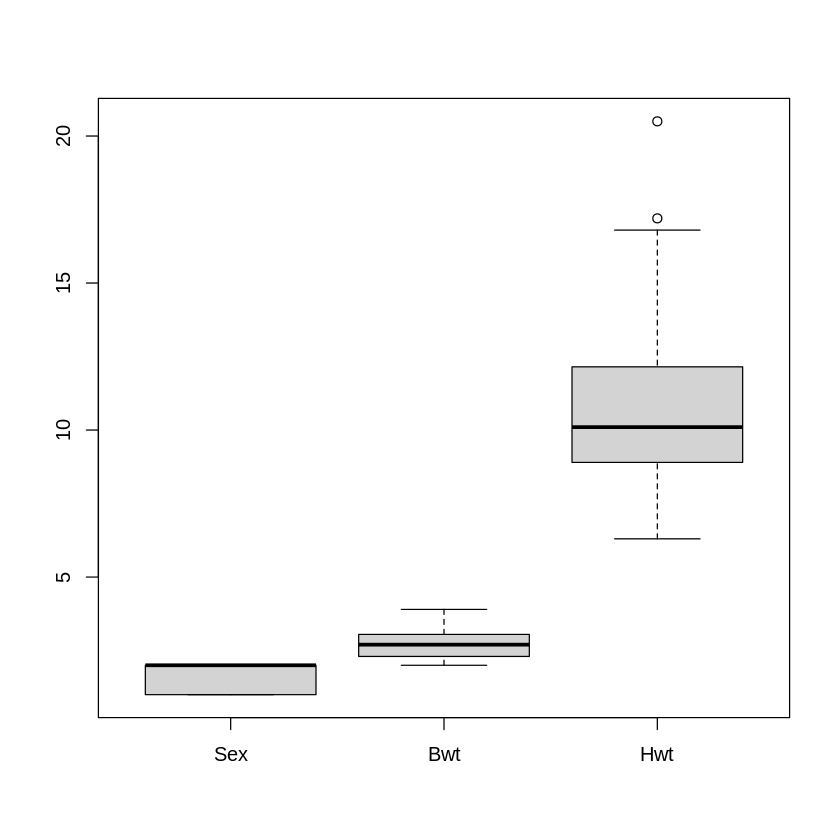

In [7]:
# 
# Zadanie 2
#

#  a) Jakiego rodzaju zmienne wyst??puj?? w zbiorze?
#  b) Jakie oceniasz mo??liwo???? skutecznej klasyfikacj?? p??ci na podstawie dw??ch pozosta??ych zmiennych?

# ODP: a) Sa 3 zmienne plec (Sex) - zmienna typu - kategoria, oraz 2 zmienne nominalne Hwt [g], Bwt [kg] - pkt 1. i 3.
# ODP: b) W okolicach Btw 3.0 kg i Hwt: 14 g  zmienia sie plec - pkt 2. 

# wgranie zbioru do cats
data(cats, package = "MASS")

# 1. Przeglad danych:
head(cats)
summary(cats)
boxplot(cats)


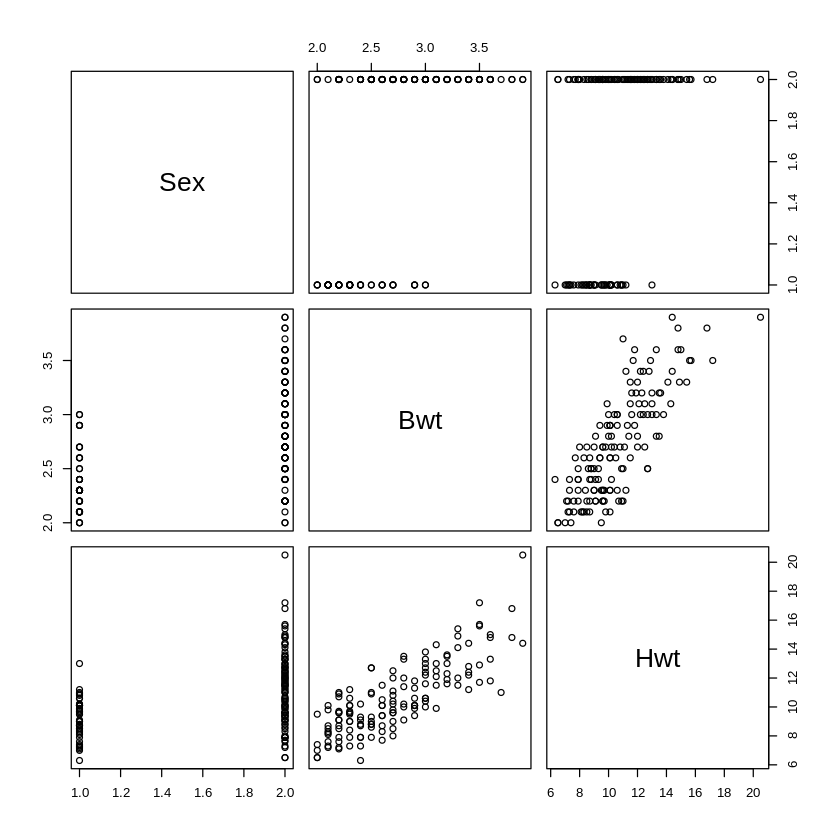

In [8]:

# 2. porownanie par
pairs(cats)



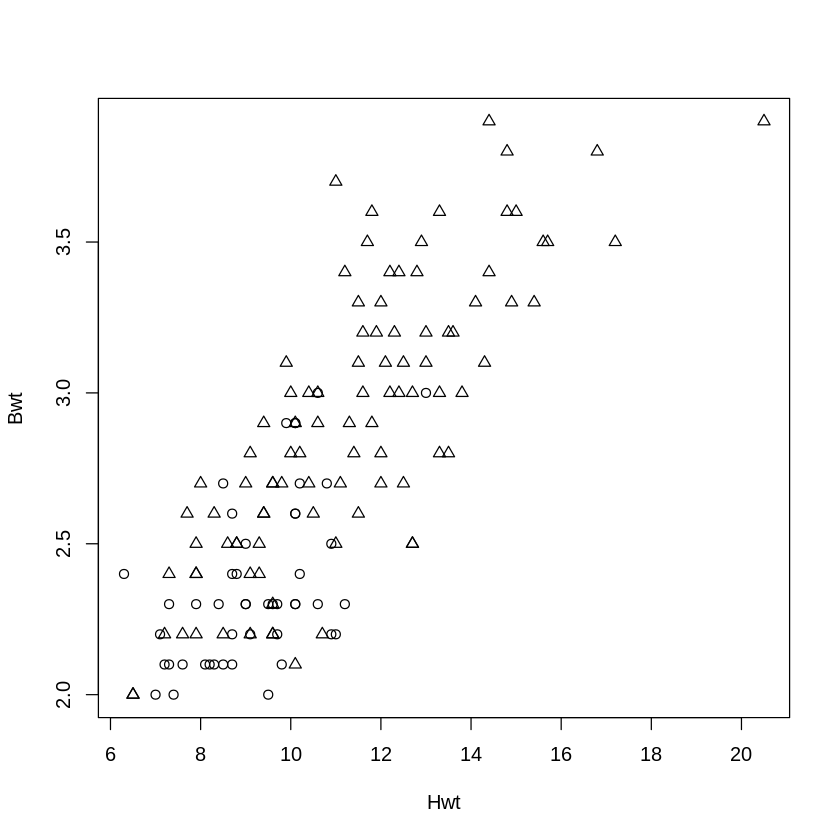

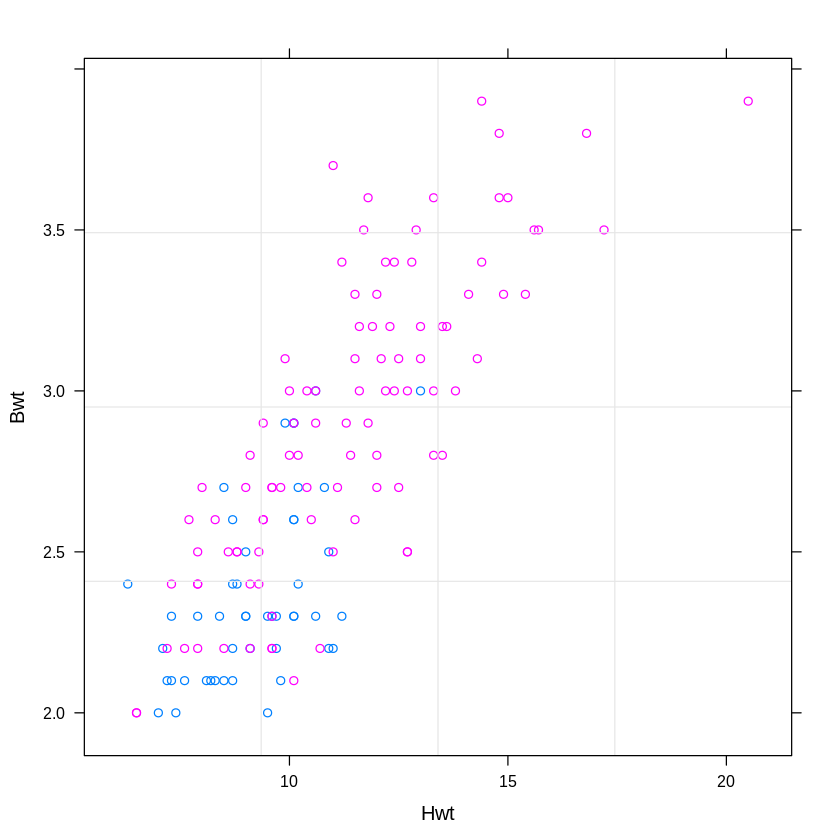

In [9]:

# 3. Wykres - #prosty plot z podzialem na klasy z plci (Sex)
attach(cats)
plot(Bwt ~ Hwt , pch=unclass(Sex))

xyplot( Bwt ~ Hwt , data = cats, groups = cats$Sex,
        panel=function(...){
          panel.xyplot(...)
          panel.grid(...)
        })

In [15]:

# 4. Sprawdzenie zaleznosci liniowej pomiedzy Sex a Bwt, Hwt

library("Hmisc")

dmy <- dummyVars(" ~ .", data = cats)
trsf <- data.frame(predict(dmy, newdata = cats))
head(trsf)
cor.test(trsf)
trsf <- subset(trsf, select = -c(SexFactor.F, SexFactor.M, SexNum))

res2 <-rcorr(as.matrix(trsf))#, type=c("spearman"))
res2

# ODP:  Sa pewne zaleznosci pomiedzy plcia a waga serca i ciala



,Sex.F,Sex.M,Bwt,Hwt,predSex.F,predSex.M,predSexProb.F,predSexProb.M
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,2.0,7.0,1,0,1,0
2,1,0,2.0,7.4,1,0,1,0
3,1,0,2.0,9.5,1,0,1,0
4,1,0,2.1,7.2,1,0,1,0
5,1,0,2.1,7.3,1,0,1,0
6,1,0,2.1,7.6,1,0,1,0


ERROR: ignored


Call:
glm(formula = Sex ~ ., family = binomial, data = cats)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1727  -0.7815   0.3141   0.7476   1.8189  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.69896    1.69982  -5.118 3.09e-07 ***
Bwt          3.55391    0.88208   4.029 5.60e-05 ***
Hwt          0.02295    0.16146   0.142    0.887    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 181.90  on 143  degrees of freedom
Residual deviance: 132.24  on 141  degrees of freedom
AIC: 138.24

Number of Fisher Scoring iterations: 5


          Reference
Prediction  F  M
         F 31 16
         M 13 84

Setting levels: control = F, case = M

Setting direction: controls < cases




Call:
roc.default(response = cats$Sex, predictor = mdl$fitted.values,     plot = TRUE, print.auc = TRUE)

Data: mdl$fitted.values in 47 controls (cats$Sex F) < 97 cases (cats$Sex M).
Area under the curve: 0.833

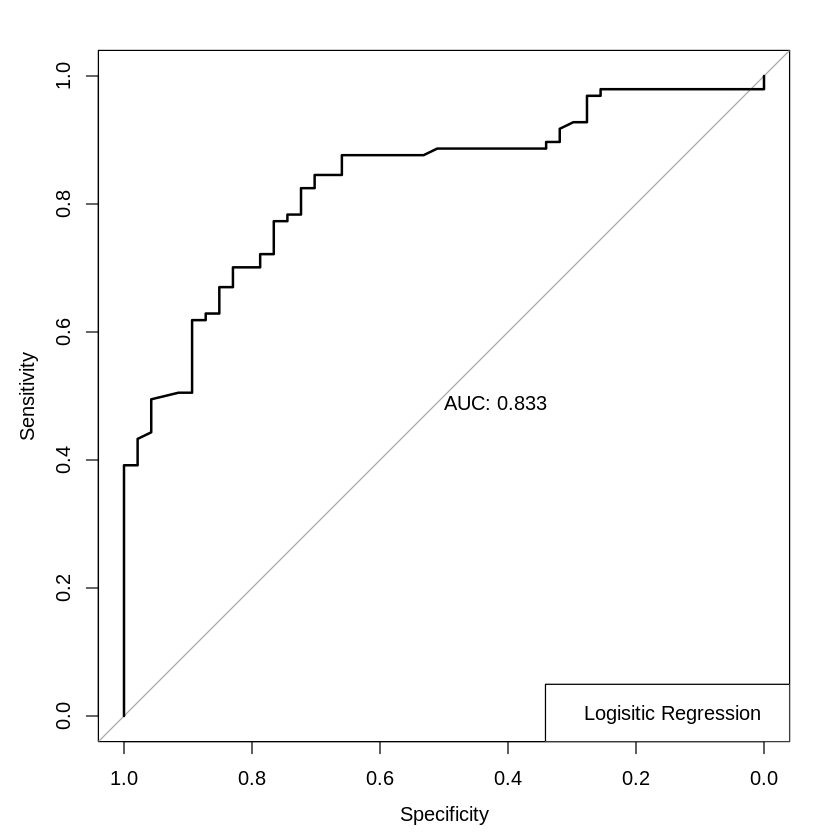

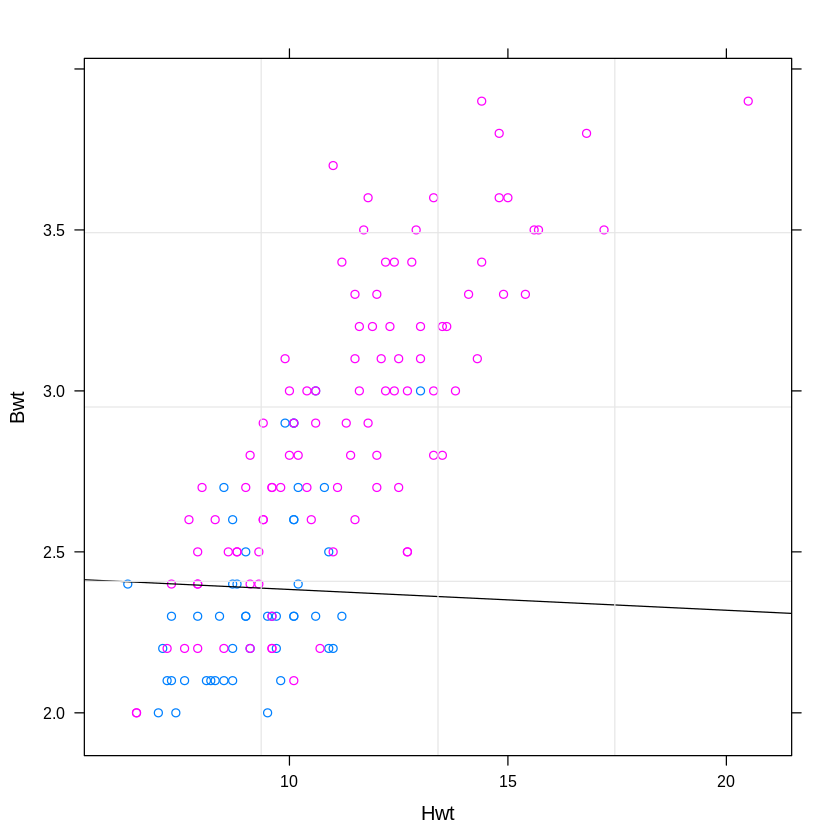

In [11]:

#
# Zadanie 3
#
# W tym kroku dla zbioru ???cats??? sprawd?? :
# 1. jak zachowa si?? prosty klasyfikator oparty o regresj?? logistyczn?? 
# 2. i narysuj granic?? decyzyjn??.

# https://machinelearningmastery.com/mcnemars-test-for-machine-learning/
# https://www.youtube.com/watch?v=xugjARegisk - ROC and AUC, Clearly Explained

# ODP: 1 - wykonane na TYLKO NA zbiorze treningowym
# AIC: 138.24 
#  Balanced Accuracy : 0.7723   
#            Reference
# Prediction  F  M
# F 31 16
# M 13 84
#

# ODP: 2
data(cats, package = "MASS")

# 1. Model regresji logistycznej
mdl = glm(Sex~., data = cats, family = binomial)

summary(mdl)

# CONFUSION MATRIX
cats$response = predict(mdl, cats, type = "response")

cats$predSex[ which(cats$response >= 0.5)] = 'M'
cats$predSex[ which(cats$response < 0.5)] = 'F'


TP = sum(cats$Sex == 'M' & cats$predSex == 'M')
TN = sum(cats$Sex == 'F' & cats$predSex == 'F')
FP = sum(cats$Sex == 'M' & cats$predSex == 'F')
FN = sum(cats$Sex == 'F' & cats$predSex == 'M')

cm_glm <- confusionMatrix(factor(cats$Sex),factor( cats$predSex ))

cm_glm$table

# ROC - wykres dla wszystkich poziomow prawdopodobienstwa
roc(cats$Sex, mdl$fitted.values, plot=TRUE, print.auc=TRUE)
legend("bottomright", legend=c("Logisitic Regression"))



#fourfoldplot(cm$table)

# 2. Wspolczynniki prostej (plaszczyzny) granicy decyzyjnej
slope <- coef(mdl)[3]/(-coef(mdl)[2])
intercept <- coef(mdl)[1]/(-coef(mdl)[2]) 

xyplot( Bwt ~ Hwt , data = cats, groups = cats$Sex,
        panel=function(...){
          panel.xyplot(...)
          panel.abline(intercept , slope)
          panel.grid(...)
        })


      Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
   0.798611111    0.534344335    0.723748456    0.860784470    0.694444444 
AccuracyPValue  McnemarPValue 
   0.003364592    0.710346569 



Call:
svm(formula = Sex ~ ., data = cats, kernel = "linear", cost = 1, 
    probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  78

 ( 39 39 )


Number of Classes:  2 

Levels: 
 F M




ERROR: ignored

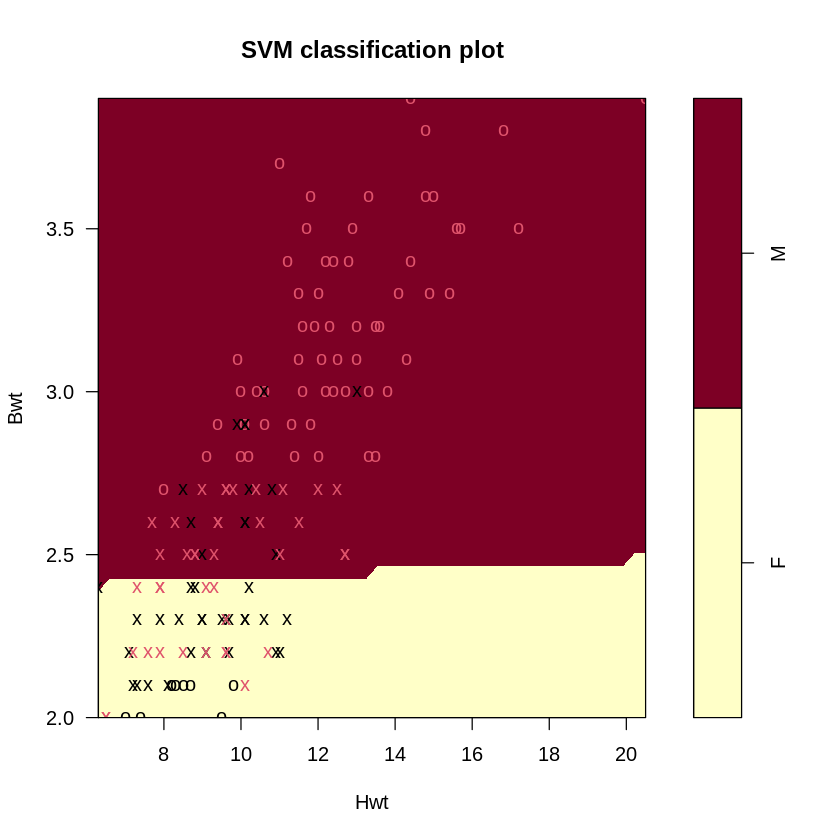

In [14]:


#
# Zadanie 4
#
# ODP: Modele maja podobne wskazniki, ktory 'lepszy' moze zdecydowac ilosc TP i FP w zaleznosci od potrzeb. 
# Bazujac na tablicy pomylekmodel glm vs svm cost =1 -> narazie gorzej GLM
#
# GLM # Prediction  F  M
# F 31! 16
# M 13 84
#
# SVM Reference
# Prediction  F  M
# F 33* 14
# M 16 81
#
# GLM
# 1. Model regresji logistycznej
print(cm_glm$overall)


# SVM
data(cats, package = "MASS")

m1 <- svm(Sex~., data = cats, kernel="linear", cost=1, probability=TRUE)
plot(m1,cats)
summary(m1)
cats$predSex = predict(m1,cats)
cats$predSexProb = predict(m1, cats, probability = TRUE)

# CONFUSION MATRIX
cm_svm_c1 <- confusionMatrix(factor(cats$Sex),factor( cats$predSexa ))

print(cm_svm_c1$overall)

# POROWNANIE: glm vs svm, tablica pomylek i ogolne wskazniki

cm_glm$table
cm_glm$overall
cm_glm$byClass

cm_svm_c1$table
cm_svm_c1$overall
cm_svm_c1$byClass

